# Finding the Best Markets to Advertise In

Here at company XYZ, we offer courses on programming and most of them are on web and mobile development, as well as data science, game development, etc. We'd like to promote our product through advertisement. 

Therefor, the goal of this project is to find out the two best markets to advertise in.

Since organizing a survey can be very costly and time consuming, for this project, we will analyze data collected from freeCodeCamp's 2017 New Coder Survey. It is an anonymous survey of more than 20,000 developers who started coding less than 5 years ago. The data can be found [here](https://github.com/freeCodeCamp/2017-new-coder-survey). Feel free to also take a look at their article regarding this survey [here](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/). 

Let's start by exploring the data. 

## Understanding the Data

In [176]:
import pandas as pd
import numpy as np

survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory = 0)

In [177]:
print(survey.shape)
pd.options.display.max_columns = 150
survey.head()

(18175, 136)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

Some interesting columns seem to be CountryLive, EmploymentField, EmploymentStatus, JobRoleInterest, ExpectedEarning, Gender, Income, MoneyForLearning...

## Checking for Sample Representativity

For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

- Where are these new coders located.
- What are the locations with the greatest number of new coders.
- How much money new coders are willing to spend on learning.

Before starting to analyze the sample data we have, we need to clarify whether it's representative for our population of interest and it has the right categories of people for our purpose. Let's take a look at the `JobRoleInterest` column, which describes for every participant the role(s) they'd be interested in working. If we consider that a participant is interested in working in a certain domain, that can also mean they are interested in learning about that domain.

In [178]:
jobInterestFreq = survey['JobRoleInterest'].value_counts(normalize = True)*100
jobInterestFreq.head(10)

Full-Stack Web Developer                               11.770595
  Front-End Web Developer                               6.435927
  Data Scientist                                        2.173913
Back-End Web Developer                                  2.030892
  Mobile Developer                                      1.673341
Game Developer                                          1.630435
Information Security                                    1.315789
Full-Stack Web Developer,   Front-End Web Developer     0.915332
  Front-End Web Developer, Full-Stack Web Developer     0.800915
  Product Manager                                       0.786613
Name: JobRoleInterest, dtype: float64

From the frequency table above we can see that some of the participants are interested in *full-stack web development*, *front-end web development*, few participants are interested in *data science*, *back-end web development*, and *mobile development*. Even smaller portions are interested in other subjects, some of them many subjects at a time.

Since people can be interested in more than one subject, let's take a look at how the participants divide in relation to the number of options. 

In [179]:
# Split each string in the JobRoleInterest column to find the number of options for each participant.
# We'll first drop the null values because we can't split Nan values.
# Generate a frequency table for the variable describing the number of options.

# survey['JobRoleInterest'].isnull().value_counts()
jobInterest_no_nulls = survey['JobRoleInterest'].dropna() # Removing all the null values
jobInterest = jobInterest_no_nulls.str.split(",") #turning the string into a list
jobInterest.head(10)

1                            [Full-Stack Web Developer]
2     [  Front-End Web Developer,  Back-End Web Deve...
3     [  Front-End Web Developer,  Full-Stack Web De...
4     [Full-Stack Web Developer,  Information Securi...
6                            [Full-Stack Web Developer]
9     [Full-Stack Web Developer,    Quality Assuranc...
11    [  DevOps / SysAdmin,    Data Scientist,  Info...
13    [Back-End Web Developer,  Full-Stack Web Devel...
14                           [Full-Stack Web Developer]
15                           [Full-Stack Web Developer]
Name: JobRoleInterest, dtype: object

In [180]:
## Finding out the length of each list which corresponds to the number of options the participant chose:
n_of_options = jobInterest.apply(lambda x: len(x))
n_of_options.value_counts(normalize = True)*100

1     31.650458
3     15.889588
4     15.217391
5     12.042334
2     10.883867
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
12     0.300343
11     0.185927
13     0.028604
Name: JobRoleInterest, dtype: float64

From the frequency table above, we see that about 31.7% of participants have a defined domain, while the majority are split into more than one interest. 

Since the focus of our courses is on web and mobile development, let's determine ow many people are interested in at least one of these two subjects. 

In [181]:
web_or_mobile = jobInterest_no_nulls.str.contains('Web Developer|Mobile Developer')
print(web_or_mobile.value_counts())
print('------------- Frequency Table Normalized ------------')
freq_table = web_or_mobile.value_counts(normalize = True)*100
print(freq_table)

True     6030
False     962
Name: JobRoleInterest, dtype: int64
------------- Frequency Table Normalized ------------
True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


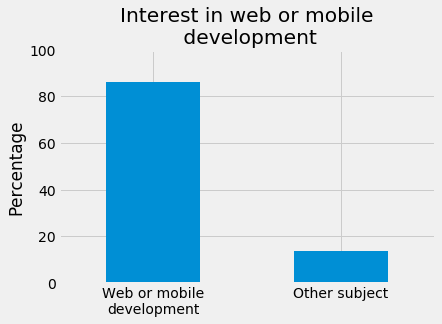

In [182]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

freq_table.plot.bar()
plt.ylabel('Percentage')
plt.ylim([0,100])
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'],
           rotation = 0)
plt.title('Interest in web or mobile\n development')
plt.show()

As we can see from the graph, about 86% or participants have interest in at least one of the two subjects we're interested in. 

## New Coders - Locations and densities

Now that we found out that the sample has the right categories of people for our purpose, we can begin analyzing it to define: where are these new coders located, what are the locations with the greatest number of new coders, and how much money new coders are willing to spend on learning.

Let's start out by removing the rows from the sample where the participants didn't answer about their job interest. 

In [183]:
survey_new = survey[survey['JobRoleInterest'].notnull()]

To find out where there new coders are located, we'll use the `CountryLive` column. 

In [184]:
survey_new.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,software development and IT,NaN,Employed for wages,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,25.0,14f1863afa9c7de488050b82eb3edd96,21ba173828fbe9e27ccebaf4d5166a55,13000.0,1.0,0.0,0.0,0.0,Within 7 to 12 months,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,work for a medium-sized company,1.0,"Front-End Web Developer, Back-End Web Develo...",no preference,Spanish,"single, never married",1000.0,5.0,2ed189768e,2017-03-09 00:37:58,2017-03-09 00:33:53,2017-03-09 00:40:14,2017-03-09 00:38:02,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Codenewbie,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,high school diploma or equivalent (GED),NaN,NaN,

In [185]:
abs_freq = survey_new['CountryLive'].value_counts()
rel_freq = survey_new['CountryLive'].value_counts(normalize = True)*100
print('--------------- Absolute Frequency ----------------')
print(abs_freq)
print('\n--------------- Relative Frequency ----------------')
print(rel_freq)

--------------- Absolute Frequency ----------------
United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Poland                       131
                            ... 
Nicaragua                      1
Kyrgyzstan                     1
Gambia                         1
Aruba                          1
Bolivia                        1
Name: CountryLive, Length: 137, dtype: int64

--------------- Relative Frequency ----------------
United States of America    45.700497
India                        7.721556
United Kingdom               4.606610
Canada                       3.802281
Poland                       1.915765
                              ...    
Nicaragua                    0.014624
Kyrgyzstan                   0.014624
Gambia                       0.014624
Aruba                        0.014624
Bolivia                      0.014624
Name: CountryLive, Length: 137, dtype: float64


Most participants are located in the United States (45.7%) and India (7.7%). This information isn't enough though. We need to find out if new coders in these locations are willing to spend money on learning and how much. Advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.

## Spending Money for Learning 

Our next step is to find out how much money new coders are willing to spend on learning. For this analysis, we'll use the `MoneyForLearning` column which describes in US dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. 

Our company sells subscriptions at a price of $59 per month, and for this reason we're interested in finding out how much money each student spends per month. 

We'll also narrow our analysis to only the first 4 countries in the frequency table: USA, India, United Kingdom, and Canada because they have the highest absolute frequencies and also because our courses are written in English and English is an official language in these countries. 

In [186]:
## Finding the amount of money spent per month

(survey_new['MonthsProgramming'] == 0).value_counts() 


False    6757
True      235
Name: MonthsProgramming, dtype: int64

Since some participants answered 0 for months programming, so we replace those with 1

In [187]:
survey_new['MonthsProgramming'] = survey_new['MonthsProgramming'].replace(0, 1)

C:\Users\catha\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Next we'll create the column `MoneyLearningPerMonth` for the amount of money each student spent each month until the survey

In [188]:
survey_new['MoneyLearningPerMonth'] = survey_new['MoneyForLearning'] / survey_new['MonthsProgramming']

C:\Users\catha\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Let's check how many null values we have for the `MoneyLearningPerMonth` column.

In [189]:
survey_new['MoneyLearningPerMonth'].isnull().value_counts()

False    6317
True      675
Name: MoneyLearningPerMonth, dtype: int64

Removing the rows where `MoneyLearningPerMonth` or `CountryLive` is null

In [190]:
survey_new = survey_new[survey_new['MoneyLearningPerMonth'].notnull()]
survey_new = survey_new[survey_new['CountryLive'].notnull()]

In [191]:
print(survey_new['MoneyLearningPerMonth'].isnull().value_counts())
print(survey_new['CountryLive'].isnull().value_counts())

False    6212
Name: MoneyLearningPerMonth, dtype: int64
False    6212
Name: CountryLive, dtype: int64


Now let's find the mean and the median and group by the country. 

In [192]:
survey_mean = survey_new.groupby(['CountryLive']).mean()
countries_mean = survey_mean['MoneyLearningPerMonth'][['United States of America','India', 'United Kingdom','Canada']]
survey_median = survey_new.groupby(['CountryLive']).median()
countries_median = survey_median['MoneyLearningPerMonth'][['United States of America','India', 'United Kingdom','Canada']]
# survey_mode = survey_new.groupby(['CountryLive']).mode()

In [193]:
countries_mean

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: MoneyLearningPerMonth, dtype: float64

In [194]:
countries_median

CountryLive
United States of America    3.333333
India                       0.000000
United Kingdom              0.000000
Canada                      0.000000
Name: MoneyLearningPerMonth, dtype: float64

Surprisingly, participants from India spend more on learning than United Kingdom and Canada. If we considered a few socio-economical metrics like the GDP, we'd expect people in the UK and Canada to spend more on learning than people from India. It might be that we don't have have enough representative data for the United Kingdom, Canada, and India, or we have some outliers (maybe coming from wrong survey answers) making the mean too big for India, or too low for the UK and Canada. Or it might be that the results are correct. 

Let's generate a boxplot to see if there are many outliers. 

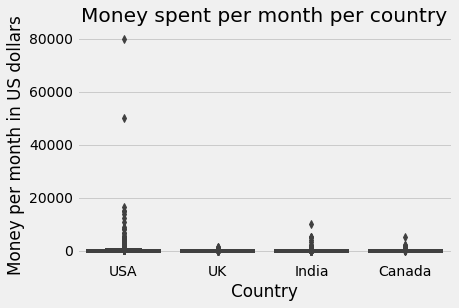

In [195]:
survey_4countries = survey_new[survey_new['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]

import seaborn as sns

sns.boxplot(y = 'MoneyLearningPerMonth', x = 'CountryLive', data = survey_4countries)
plt.title('Money spent per month per country')
plt.ylabel('Money per month in US dollars')
plt.xlabel('Country')
plt.xticks([0,1,2,3], ['USA', 'UK', 'India', 'Canada'])
plt.show()

### Removing Extreme Outliers

All of the countries have outliers, but especially the USA has extreme outliers with 50,000 and 80,000 values. Let's remove those by removing any values above 20,000

In [196]:
survey_new = survey_new[survey_new['MoneyLearningPerMonth'] < 20000]

In [197]:
## Computing the mean and  again
survey_mean = survey_new.groupby(['CountryLive']).mean()
countries_mean = survey_mean['MoneyLearningPerMonth'][['United States of America','India', 'United Kingdom','Canada']]
print(countries_mean)

CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: MoneyLearningPerMonth, dtype: float64


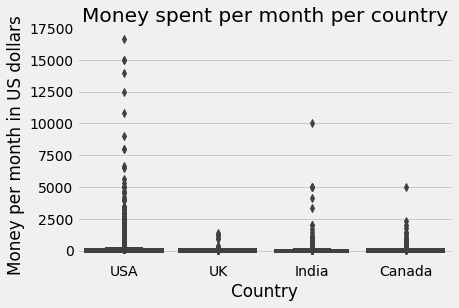

In [198]:
survey_4countries = survey_new[survey_new['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]

import seaborn as sns

sns.boxplot(y = 'MoneyLearningPerMonth', x = 'CountryLive', data = survey_4countries)
plt.title('Money spent per month per country')
plt.ylabel('Money per month in US dollars')
plt.xlabel('Country')
plt.xticks([0,1,2,3], ['USA', 'UK', 'India', 'Canada'])
plt.show()

The USA mean lowered significantly! However there are still many outliers, especially for the USA and India. Let's look at indias outliers that are above 2500.

### India's Outliers

In [199]:
survey_india = survey_new[(survey_new['CountryLive'] == 'India') & (survey_new['MoneyLearningPerMonth'] > 2500)]
survey_india_outliers = survey_india.sort_values('MoneyLearningPerMonth', ascending = False).head(10)
survey_india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyLearningPerMonth
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Unable to work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,30.0,b7fe7bc4edefc3a60eb48f977e4426e3,80ff09859ac475b70ac19b7b7369e953,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,Mobile Developer,no preference,Hindi,"single, never married",20000.0,2.0,51a6f9a1a7,2017-04-01 00:31:25,2017-04-01 00:28:17,2017-04-01 00:33:44,2017-04-01 00:31:32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
7989

We can see a few extreme outliers for India (values over \$2500 per month), but it's unclear whether this is good data or not. It seems that neither participant attended a bootcamp. Overall, it's really hard to figure out from the data whether these persons really spent that much money with learning. It seems safer to remove these rows.

In [200]:
survey_4countries = survey_4countries.drop(survey_india_outliers.index)

### USA Outliers
For the USA, there seems to be many outliers above 6000. 

In [201]:
survey_usa = survey_new[(survey_new['CountryLive'] == 'United States of America') & (survey_new['MoneyLearningPerMonth'] > 6000)]
survey_usa_outliers = survey_usa.sort_values('MoneyLearningPerMonth', ascending = False)
survey_usa_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyLearningPerMonth
16650,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,NaN,1.0,NaN,male,NaN,1.0,1.0,1.0,1.0,1.0,0.0,1.0,400000.0,40.0,e1925d408c973b91cf3e9a9285238796,7e9e3c31a3dc2cafe3a09269398c4de8,NaN,1.0,1.0,0.0,NaN,I'm already applying,1.0,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,work for a multinational corporation,1.0,"Product Manager, Data Engineer, Full-Stack W...",in an office with other developers,English,married or domestic partnership,200000.0,12.0,1a45f4a3ef,2017-03-14 02:42:57,2017-03-14 02:40:10,2017-03-14 02:45:55,2017-03-14 02:43:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,associate's degree,Computer Programming,30000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16666.666667
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,70000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,45.0,69096aacf4245694303cf8f7ce68a63f,4c56f82a348836e76dd90d18a3d5ed88,NaN,1.0,0.0,0.0,NaN,Within the next 6 months,NaN,1.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,work for a multinational corporation,1.0,"Full-Stack Web Developer, Game Developer, Pr...",no preference,English,married or domestic partnership,15000.0,1.0,53d13b58e9,2017-03-21 20:13:08,2017-03-21 20:10:25,2017-03-21 20:14:36,2017-03-21 20:13:11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1

The data showed us 11 extreme outliers, and six of attended bootcamps, which justify the large sums of money spent on learning. For the other five, it's hard to figure out from the data where they could have spent that much money on learning. Therefore, we'll remove the rows where participants reported that they spent $6000 each month, but they have never attended a bootcamp.

Also, the data shows that eight respondents had been programming for no more than three months when they completed the survey. They most likely paid a large sum of money for a bootcamp that was going to last for several months, so the amount of money spent per month is unrealistic and should be significantly lower (because they probably didn't spend anything for the next couple of months after the survey). As a consequence, we'll remove every these eight outliers.

In the next code block, we'll remove respondents that:

- Didn't attend bootcamps.
- Had been programming for three months or less when at the time they completed the survey.

In [205]:
## Defining participants that didn't attend bootcamp, but spent over 6000 or had been programming for less than 3 months
survey_usa_outliers_final = survey_usa_outliers[(survey_usa_outliers['AttendedBootcamp'] == 0) | survey_usa_outliers['MonthsProgramming'] <= 3]
survey_usa_outliers_final

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyLearningPerMonth
16650,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,NaN,1.0,NaN,male,NaN,1.0,1.0,1.0,1.0,1.0,0.0,1.0,400000.0,40.0,e1925d408c973b91cf3e9a9285238796,7e9e3c31a3dc2cafe3a09269398c4de8,NaN,1.0,1.0,0.0,NaN,I'm already applying,1.0,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,work for a multinational corporation,1.0,"Product Manager, Data Engineer, Full-Stack W...",in an office with other developers,English,married or domestic partnership,200000.0,12.0,1a45f4a3ef,2017-03-14 02:42:57,2017-03-14 02:40:10,2017-03-14 02:45:55,2017-03-14 02:43:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,associate's degree,Computer Programming,30000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16666.666667
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,70000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,45.0,69096aacf4245694303cf8f7ce68a63f,4c56f82a348836e76dd90d18a3d5ed88,NaN,1.0,0.0,0.0,NaN,Within the next 6 months,NaN,1.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,work for a multinational corporation,1.0,"Full-Stack Web Developer, Game Developer, Pr...",no preference,English,married or domestic partnership,15000.0,1.0,53d13b58e9,2017-03-21 20:13:08,2017-03-21 20:10:25,2017-03-21 20:14:36,2017-03-21 20:13:11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1

In [206]:
survey_4countries = survey_4countries.drop(survey_usa_outliers_final.index)

Let's take a look at the mean again

In [211]:
## Computing the mean and  again
countries_mean = survey_4countries.groupby(['CountryLive']).mean()
countries_mean['MoneyLearningPerMonth'].sort_values(ascending = False)

CountryLive
United States of America    142.654608
Canada                      113.510961
India                        65.758763
United Kingdom               45.534443
Name: MoneyLearningPerMonth, dtype: float64

And the boxplot

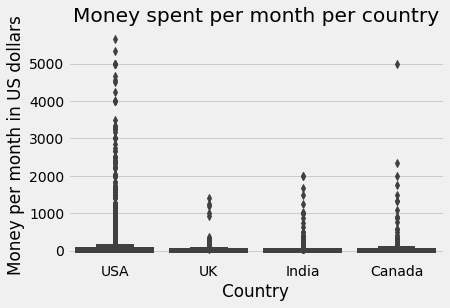

In [212]:
sns.boxplot(y = 'MoneyLearningPerMonth', x = 'CountryLive', data = survey_4countries)
plt.title('Money spent per month per country')
plt.ylabel('Money per month in US dollars')
plt.xlabel('Country')
plt.xticks([0,1,2,3], ['USA', 'UK', 'India', 'Canada'])
plt.show()

### Canada Outlier

We can see from the boxplot above that Canada has an outlier what spent 5000 per month on learning. Let's take a closer look to see if we should remove this outlier.

In [222]:
survey_canada = survey_4countries[survey_4countries['CountryLive'] == 'Canada']

In [223]:
survey_canada_outliers = survey_canada[survey_canada['MoneyLearningPerMonth'] >= 5000]
survey_canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyLearningPerMonth
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30 to 44 minutes,Canada,Canada,finance,NaN,Employed for wages,NaN,60000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,1.0,0.0,0.0,250000.0,10.0,739b584aef0541450c1f713b82025181,28381a455ab25cc2a118d78af44d8749,140000.0,1.0,1.0,0.0,0.0,I haven't decided,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,work for a multinational corporation,NaN,"Mobile Developer, Full-Stack Web Developer, ...",from home,Yue (Cantonese) Chinese,"single, never married",10000.0,2.0,41c26f2932,2017-03-25 23:23:03,2017-03-25 23:20:33,2017-03-25 23:24:34,2017-03-25 23:23:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,bachelor's degree,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


This outlier falls in the same situation we found some of the USA outliers: this participant has been programming for only two months. Because of that, we'll also remove this outlier.

In [224]:
survey_4countries = survey_4countries.drop(survey_canada_outliers.index)

In [225]:
## Computing the mean and  again
countries_mean = survey_4countries.groupby(['CountryLive']).mean()
countries_mean['MoneyLearningPerMonth'].sort_values(ascending = False)

CountryLive
United States of America    142.654608
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
Name: MoneyLearningPerMonth, dtype: float64

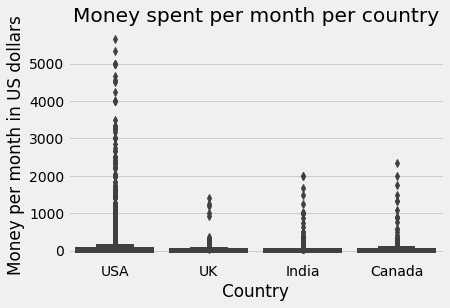

In [226]:
sns.boxplot(y = 'MoneyLearningPerMonth', x = 'CountryLive', data = survey_4countries)
plt.title('Money spent per month per country')
plt.ylabel('Money per month in US dollars')
plt.xlabel('Country')
plt.xticks([0,1,2,3], ['USA', 'UK', 'India', 'Canada'])
plt.show()

## Choosing the Two Best Markets

After removing the outliers, we finally came up with our final boxplot and it is quite obvious that the USA is a great candidate for advertising. Canada and India also seem to be good candidates! The UK, however, doesn't seem like a good candidate, given that they spend on average 43 dollars on learning per month, and the courses we offer are 59 dollars a month.

The second choice would have to come between Canada and India, so let's also take a look at the potencial customers in each country 



In [227]:
survey_4countries['CountryLive'].value_counts(normalize = True)*100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

As we can see from the table above, India makes us 11.7% of the participants while Canada makes up only 6.1%, almost half the potencial customers.

Given the information above, USA and India seem to be a good choice. However, there are some options to consider:

1. Possibly advertise in three countries: USA, India and Canada, and split the budget unequally however proportionally. 
2. Advertise in two countries (USA and India or USA and Canada), and also split the budget unequally however proportionally.

At this point, it's probably best to send our analysis to the marketing team and let them use their domain knowledge to decide. They might want to do some extra surveys in India and Canada and then get back to us for analyzing the new survey data.

# Conclusion

We analyzed the data from new coders, removed some outliers, and were able to define the USA as a good market for advertising. However, our second option wasn't so clear, as we were in doubt between Canada and India. We decided to send the results to the marketing team so they could use they domain knowledge to decide.